In [5]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Configure Account to scrap ##
#Account = 'PatoBullrich'
Account = 'horaciorlarreta'
#Account = 'SergioMassa'
#Account = 'JMilei'
#Account = 'morenoparalavic'
#Account = 'JuanGrabois'
#Account = 'myriambregman'

tweets_df1 = pd.read_json((Account+'.json'))
print('Ingestados '+str(len(tweets_df1))+' tweets de '+Account)

# Filter created_at 2023 only
tweets_df1 = tweets_df1[tweets_df1['created_at']>='2023-01-01 00:00:00']
print('De 2023 quedan: '+str(len(tweets_df1)))

# convert column to datetime
tweets_df1.created_at = pd.to_datetime(tweets_df1['created_at'])
tweets_df1['created_at_dt'] = tweets_df1['created_at'].dt.date

Ingestados 825 tweets de horaciorlarreta
De 2023 quedan: 303


### Basic Stats: Tweets per month and Favorite count for the period

Text(0.5, 1.0, 'Tweet posting per Month')

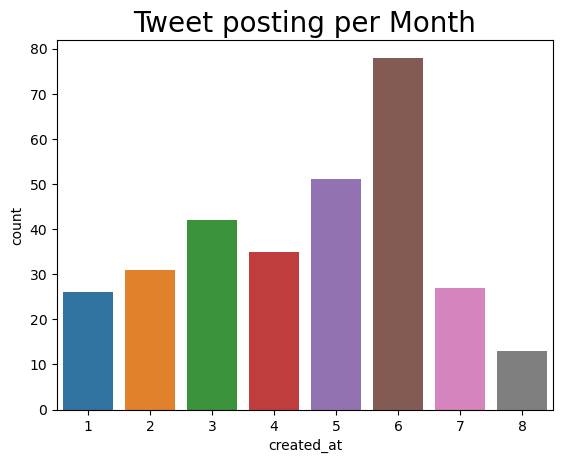

In [2]:
sns.countplot(x=tweets_df1['created_at'].dt.month).set_title("Tweet posting per Month", fontsize=20)
# title='Line 1\nLine2' also works

Text(0.5, 1.0, 'Favorite Count')

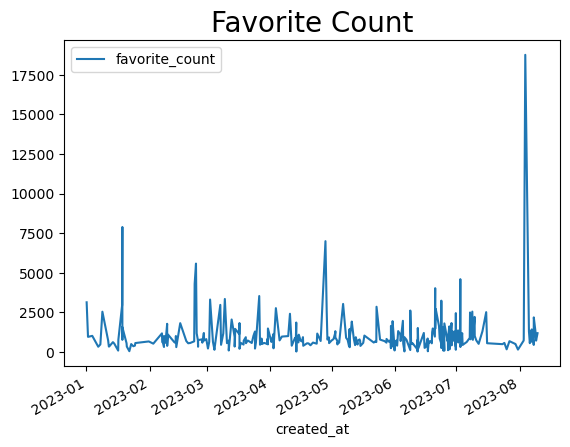

In [3]:
tweets_df1.plot.line(x='created_at', y='favorite_count').set_title("Favorite Count", fontsize=20)

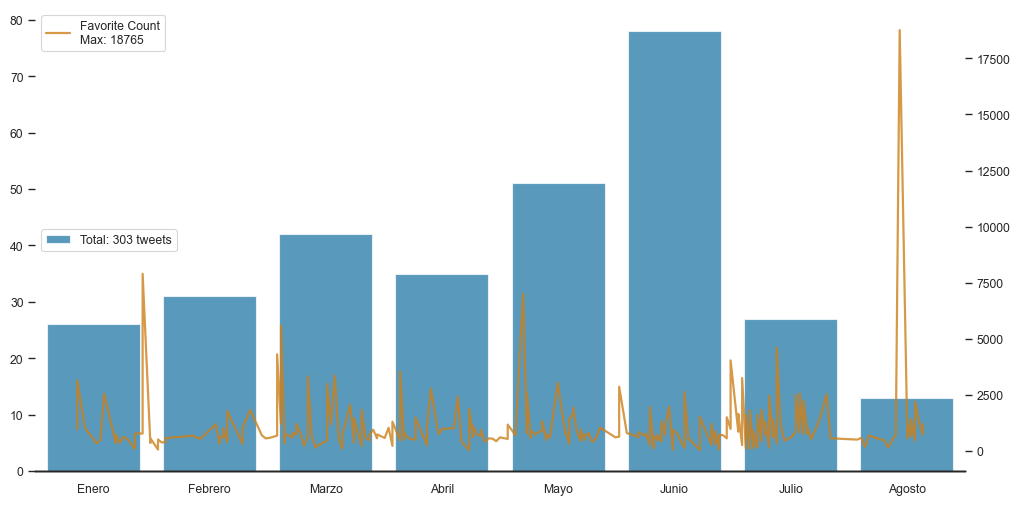

In [58]:
# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(12, 6))
# Instantiate a second axes to overlapp plots
ax2 = ax1.twinx().twiny()
# Bar plot for Tweets per Month
sns.countplot(x=tweets_df1['created_at'].dt.month,
             label=("Total: "+str(len(tweets_df1))+' tweets'),
             saturation=0.8,
             width=0.8,
             color="b",
             alpha=0.7,
             ax=ax1)
# Line plot Favorite count plot
sns.lineplot(data=tweets_df1,
            x='created_at_dt',
            y='favorite_count',
            label=('Favorite Count\nMax: '+str(tweets_df1['favorite_count'].max())),
            estimator=None,
            linewidth=1.6,
            color=(0.8, 0.5, 0.1, 0.8),
            ax=ax2)
# Style #
custom_params = { 'axes.grid': False, "axes.spines.left": False, "axes.spines.right": False, "axes.spines.top": False }
sns.set_theme(style="white", rc=custom_params)
sns.set_context("paper")
sns.set_color_codes("colorblind")
ax1.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto'])
ax2.set_xticklabels([])
ax2.tick_params(top=False)
ax2.set_xticks(np.linspace(ax2.get_xticks()[0], ax2.get_xticks()[-1], len(ax1.get_xticks())))
#supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
ax1.legend(ncol=2, loc="center left", frameon=True)
ax2.legend(ncol=2, loc="best", frameon=True)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax2.set_xlabel(None)
ax2.set_ylabel(None)

plt.savefig('img/'+Account+'_plots.png')
plt.show()

### Use Spacy to get Part-of-speech (POS) Tagging over all tweet's contents.

### Then filter list with Nouns, Verbs and  Adjetives and use Counter to generate ranking.

In [7]:
from collections import Counter
import spacy
#spacy.load('en_core_web_sm')
nlp = spacy.load("es_core_news_sm")

## Load all Tweets as a single text and process it
string = ''
string = string.join([ str(item) for item in tweets_df1['text'] ])
doc = nlp(string)

In [8]:
lista = []
for token in doc:
    if token.is_alpha and ((token.pos_=='PROPN')or(token.pos_=='NOUN')or(token.pos_=='VERB')):
        lista.append(token.text)
# Fix some names
lista = ['Buenos Aires' if x=='Buenos' else x for x in lista]
lista = [ x for x in lista if x!='Aires']
lista = ['Santa Fe' if x=='Santa' else x for x in lista]
lista = [ x for x in lista if x!='Fe']

# Generate Counter
counter = Counter(lista)
#type(counter)
#counter2.most_common(120)

### WordClouds!!!

In [9]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

def wc(counter_):
    # read the mask / color image
    mask_image = Image.open('img/'+Account+'_masked.png')
    mask_image = mask_image.resize((600, 600))
    #mask_image = mask_image.transpose(Image.FLIP_LEFT_RIGHT)
    mask = np.array(mask_image)
    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    #A small wordloud wrapper
    w_c_ = WordCloud(width=1200, height=800,
                   background_color="white",
                   max_words=120,
                   mask=mask,
                   max_font_size=40,
                   random_state=42
                   )   
    w_c_.generate_from_frequencies(counter_)
    #Plot
    plt.imshow(w_c_.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    #Generate file
    w_c_.to_file('img/'+Account+'_wordcloud.png')


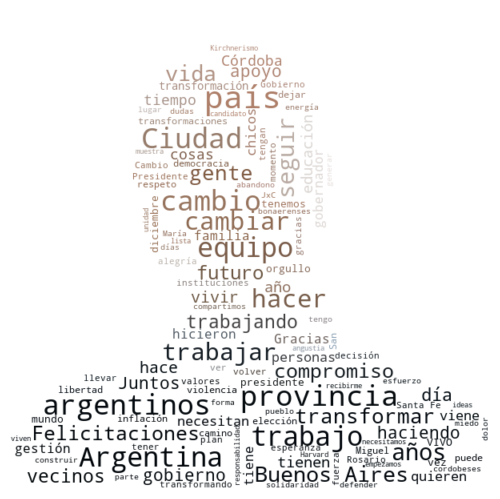

In [10]:
wc(counter)

### Ranking of the most mentioned by @Account

In [11]:
import re
lista2 = []
pattern = r"@\w"
for token in doc:
    if (re.match(pattern, token.text)):
        lista2.append(token.text)

In [12]:
counter2 = Counter(lista2)
counter2.most_common(20)

[('@diegosantilli', 13),
 ('@GerardoMorales', 9),
 ('@gustavovaldesok', 5),
 ('@ljuez', 5),
 ('@rodrigodeloredo', 5),
 ('@Maxiferraro', 4),
 ('@DrMarceloOrrego', 4),
 ('@alfarogerman', 4),
 ('@GustavoSaenzOK', 3),
 ('@MiguelPichetto', 3),
 ('@maxipullaro', 3),
 ('@jlespert', 3),
 ('@GiScaglia', 2),
 ('@alfredocornejo', 2),
 ('@rodysuarez', 2),
 ('@UlpianoSuarez', 2),
 ('@gerardomerinotw', 2),
 ('@NachoTorresCH', 2),
 ('@GugaLusto', 2),
 ('@WolffWaldo', 2)]

In [13]:
def wc2(counter_):
    # read the mask image
    mask_image2 = Image.open('img/dialog_baloon.png')
    mask_image2 = mask_image2.resize((400, 400))
    mask_image2 = mask_image2.transpose(Image.FLIP_LEFT_RIGHT)
    mask2 = np.array(mask_image2)
    #A small wordloud wrapper
    w_c_ = WordCloud(width=1200, height=800,
                   background_color="white",
                   max_words=120,
                   mask=mask2,
                   max_font_size=40,
                   random_state=42
                   )   
    w_c_.generate_from_frequencies(counter_)
    #Plot
    plt.imshow(w_c_, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    #Generate file
    w_c_.to_file('img/'+Account+'_@_wordcloud.png')

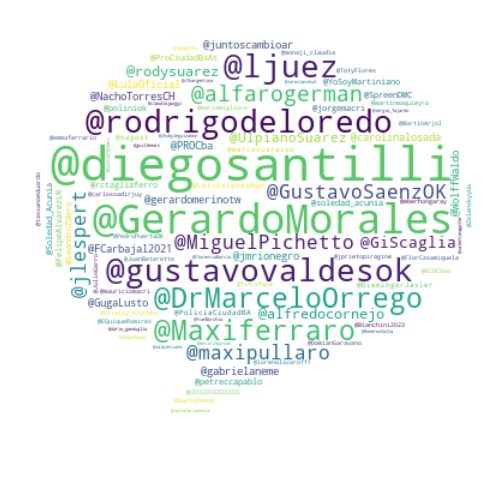

In [14]:
wc2(counter2)